# Download and Load data

In [1]:
from datasets import load_dataset
import datasets
from pathlib import Path

In [2]:

folder_path = Path(r"E:\ML\NLP_Toolbox\NER\polyglot_ner\combined\1.0.0\bb2e45c90cd345c87dfd757c8e2b808b78b0094543b511ac49bc0129699609c1")
data = []
for file_path in folder_path.glob("*"):
    if file_path.is_file():
        data.append(str(file_path.resolve()))
data = data[1:]

In [3]:
from datasets import Dataset
dataset = load_dataset("arrow", data_files=data,split='train')

Found cached dataset arrow (C:/Users/11/.cache/huggingface/datasets/arrow/default-5bc4303e6b42c700/0.0.0/74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137)


# testing Persian and English corpus

In [4]:
from collections import defaultdict
from datasets import DatasetDict

In [5]:
# Define the filter condition
filter_condition = lambda example: example["lang"] == "fa" or example["lang"] == "en"

# Apply the filter
corpus = dataset.filter(filter_condition)

Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-e7769ddc44ade02a.arrow


In [6]:
import pandas as pd
df = pd.DataFrame(corpus)

In [7]:
df.sample(5)

,id,lang,words,ner
886646,16258747,en,"[Biography, Born, at, the, Royal, Palace, of, ...","[O, O, O, O, O, O, O, PER, O, O, O, O, PER, O,..."
195620,11111514,fa,"[تحقیقات, او, در, این, سفر, به, کشف, باسیل, یر...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
896443,16268544,en,"[Distribution, This, species, is, found, only,...","[O, O, O, O, O, O, O, LOC, LOC, LOC, O, LOC, O..."
49550,10965444,fa,"[ترجمه, فارسی, آن, اخیراً, در, ایران, منتشر, ش...","[O, O, O, O, O, O, O, O, O, O]"
781098,16153199,en,"[Her, best, achievement, in, track, running, i...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916885 entries, 0 to 916884
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      916885 non-null  object
 1   lang    916885 non-null  object
 2   words   916885 non-null  object
 3   ner     916885 non-null  object
dtypes: object(4)
memory usage: 28.0+ MB


In [9]:
df['lang'].value_counts()

fa    492903
en    423982
Name: lang, dtype: int64

In [10]:
unique_tags = set()

for tags in df['lang']:
    unique_tags.update(tags)

unique_tags

{'a', 'e', 'f', 'n'}

In [11]:
df_per = df.loc[df['lang']=="fa"]

In [12]:
df_en = df.loc[df['lang']=="en"]

In [13]:
from random import randint
rnd = randint(0,len(df_per))
print(" ".join(df_per.iloc[rnd]["words"]))
print(",".join(df_per.iloc[rnd]["ner"]))

جستارهای وابسته منابع
O,O,O


In [14]:
from random import randint
rnd = randint(0,len(df_en))
print(" ".join(df_en.iloc[rnd]["words"]))
print(",".join(df_en.iloc[rnd]["ner"]))

Faulkner was selected for the South African tour of the United Kingdom in 1907 and his mastery of googly bowling , along with that of his team mates Reginald Schwarz , Bert Vogler and Gordon White , had a significant effect on the acceptance of wrist spin as an effective bowling weapon .
PER,O,O,O,O,O,O,O,O,O,LOC,LOC,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,PER,PER,O,PER,PER,O,PER,PER,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


In [15]:
counter = {}
for row in df["ner"]:
     for tag in row:
        if tag != "O":
            if tag not in counter.keys():
                 counter[tag] = 1
            else:
                 counter[tag]  = counter[tag]  + 1
                
    
pd.DataFrame.from_dict(counter, orient="index")

,0
LOC,529168
PER,347971
ORG,314055


In [16]:
for row in df["words"]:
    print(row)
    break

['۳', ')', 'انتشاردر', 'این', 'مکانیزم', 'نتیجه', 'عملکرد', 'فیلتر', 'بطرز', 'چشمگیری', 'افزایش', 'می', 'یابد', '.', 'در', 'اثر', 'تصادم', 'مولکول', 'های', 'گازی', 'با', 'ذرات', 'معلق', 'بسیار', 'کوچک', '(', 'کمتر', 'از', '۰', '/', '۱', 'میکرون', ')', 'جهت', 'حرکت', 'ذرات', 'معلق', 'در', 'داخل', 'فیلتر', 'تغییر', 'کرده', 'و', 'سرعت', 'اش', 'نیز', 'کاهش', 'می', 'یابد', 'و', 'همین', 'تأخیر', 'باعث', 'بالا', 'رفتن', 'احتمال', 'توقف', 'و', 'گیرکردن', 'ذره', 'معلق', 'در', 'درون', 'فیلتر', 'می', 'شود', '.(', 'قابل', 'مقایسه', 'باپدیده', 'فیزیکی', '"', 'حرکت', 'بروانین', '")', 'این', 'روش', 'در', 'جذب', 'ذرات', 'با', 'قطر', 'کمتر', 'از', '۰', '/', '۱', 'میکرون', 'روش', 'برتر', 'می', 'باشد.همانطور', 'که', 'دو', 'روش', 'تراکم', 'و', 'مسدود', 'کردن', 'در', 'جذب', 'ذرات', 'بالاتر', 'از', '۰', '/', '۴', 'میکرون', 'مؤثر', 'می', 'باشند.ذرات', 'بین', 'این', 'دو', 'اندازه', 'بیشترین', 'نفوذ', 'را', 'در', 'فیلتر', 'می', 'کنند', '(', '۰', '/', '۳', 'میکرون', ')', 'که', 'توأماً', 'توسط', 'هر', 'سه', 'عام

## Split data

In [17]:
filter_persian_condition = lambda example: example["lang"] == "fa"
filter_english_condition  = lambda example: example["lang"] == "en"

persian = dataset.filter(filter_persian_condition)
english = dataset.filter(filter_english_condition)

Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-822c5d6a012fbc65.arrow
Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-e5244abdbe194ace.arrow


In [18]:
len(persian) + len(english)

916885

In [19]:
persian_spllited = persian.train_test_split(test_size=0.2)
english_spllited = english.train_test_split(test_size=0.2)

train = datasets.concatenate_datasets([persian_spllited['train'], english_spllited['train']])
test = datasets.concatenate_datasets([persian_spllited['test'], english_spllited['test']])

In [20]:
train

Dataset({
    features: ['id', 'lang', 'words', 'ner'],
    num_rows: 733507
})

In [21]:
test

Dataset({
    features: ['id', 'lang', 'words', 'ner'],
    num_rows: 183378
})

In [75]:
len(test) + len(train)

916885

# Check and save dataset 

In [82]:
df = pd.DataFrame(train)

In [107]:
from random import randint
rnd = randint(0,len(df))
print(" ".join(df.iloc[rnd]["words"]))
print(",".join(df.iloc[rnd]["ner"]))

While Ann contemplates switching to the cosmetics business , LeTour , who suffers from insomnia , has lost his perspective in life .
O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


In [108]:
train.save_to_disk("train.hf")
test.save_to_disk("test.hf")

Saving the dataset (0/1 shards):   0%|          | 0/733507 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/183378 [00:00<?, ? examples/s]

# Creating 25k sentences corpus for trainin ( 12.5K Persian, 12.5K English)

In [36]:
from datasets import Dataset
dataset = load_dataset("arrow", data_files=data,split='train')

Found cached dataset arrow (C:/Users/11/.cache/huggingface/datasets/arrow/default-5bc4303e6b42c700/0.0.0/74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137)


In [37]:
filter_persian_condition = lambda example: example["lang"] == "fa"
filter_english_condition  = lambda example: example["lang"] == "en"

persian = dataset.filter(filter_persian_condition)
english = dataset.filter(filter_english_condition)

Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-822c5d6a012fbc65.arrow
Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-e5244abdbe194ace.arrow


In [38]:
def ratio_tagging(example):
    example['ratio'] = 1 - (example['ner'].count("O") / len(example['ner']))
    return example

In [39]:
persian_ratio = persian.map(ratio_tagging)
english_ratio = english.map(ratio_tagging)

Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-d5fc78385a1b42b0.arrow
Loading cached processed dataset at C:\Users\11\.cache\huggingface\datasets\arrow\default-5bc4303e6b42c700\0.0.0\74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137\cache-03013e4aa6bcac5f.arrow


In [40]:
import pandas as pd
persian_ratio_dataframe = pd.DataFrame(persian_ratio['ratio'])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

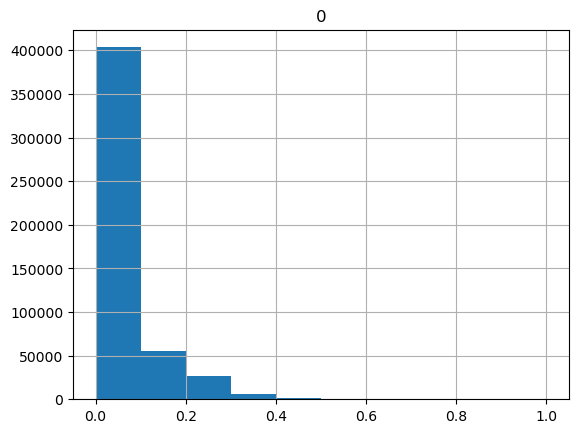

In [41]:
persian_ratio_dataframe.hist()

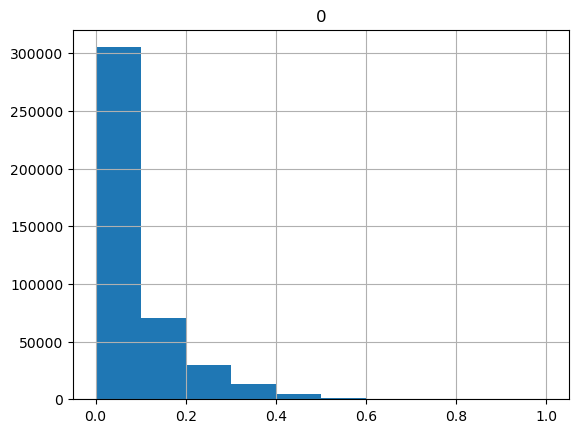

In [42]:
english_ratio_dataframe = pd.DataFrame(english_ratio['ratio']).hist()

In [43]:
from datasets import concatenate_datasets
from random import sample
def create_uniformed_ratio(data, length):
    zero_ratio_indices = [i for i, example in enumerate(data) if example['ratio'] == 0.0]
    zero_point_one_ratio_indices = [i for i, example in enumerate(data) if  0.0 < example['ratio'] < 0.1]
    zero_point_two_ratio_indices = [i for i, example in enumerate(data) if  0.1<= example['ratio'] < 0.25]
    zero_point_four_ratio_indices = [i for i, example in enumerate(data) if 0.25 <= example['ratio'] ]
    
    zero_ratio_indices = sample(zero_ratio_indices,length )
    zero_point_one_ratio_indices = sample(zero_point_one_ratio_indices,length)
    zero_point_two_ratio_indices = sample(zero_point_two_ratio_indices,length)
    zero_point_four_ratio_indices = sample(zero_point_four_ratio_indices,length)
                                              
    zero_ratio_examples = data.select(zero_ratio_indices)
    zero_point_one_ratio_examples = data.select(zero_point_one_ratio_indices)
    zero_point_two_ratio_examples = data.select(zero_point_two_ratio_indices)
    zero_point_four_ratio_examples = data.select(zero_point_four_ratio_indices)
    

    return concatenate_datasets([zero_ratio_examples, zero_point_one_ratio_examples ,zero_point_two_ratio_examples, zero_point_four_ratio_examples])


In [44]:
persian_ratio_2k = create_uniformed_ratio(persian_ratio,3125)
english_ratio_2k = create_uniformed_ratio(english_ratio,3125)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

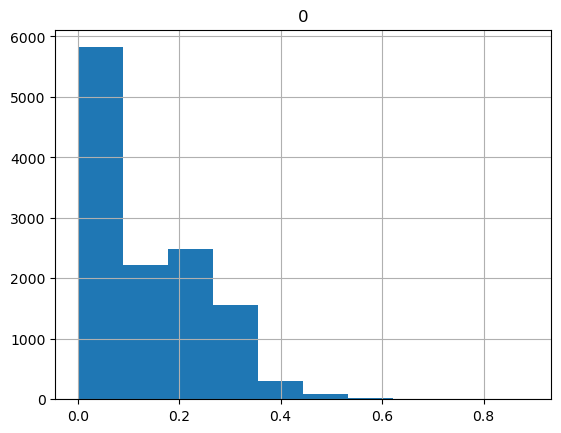

In [45]:
pd.DataFrame(persian_ratio_2k['ratio']).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

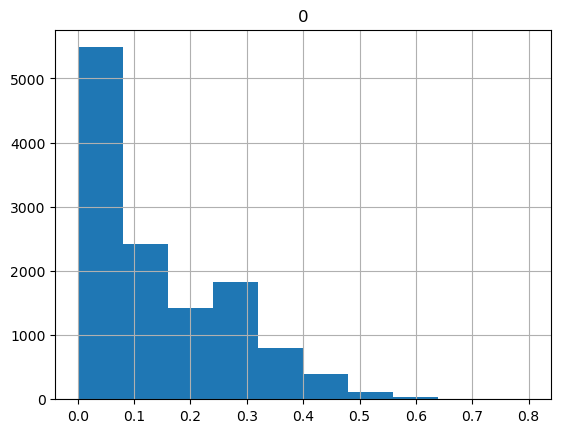

In [46]:
pd.DataFrame(english_ratio_2k['ratio']).hist()

In [47]:
persian_ratio_2k, english_ratio_2k

(Dataset({
     features: ['id', 'lang', 'words', 'ner', 'ratio'],
     num_rows: 12500
 }),
 Dataset({
     features: ['id', 'lang', 'words', 'ner', 'ratio'],
     num_rows: 12500
 }))

In [48]:
persian_spllited = persian_ratio_2k.train_test_split(test_size=0.2)
english_spllited = english_ratio_2k.train_test_split(test_size=0.2)

train = datasets.concatenate_datasets([persian_spllited['train'], english_spllited['train']])
test = datasets.concatenate_datasets([persian_spllited['test'], english_spllited['test']])

In [50]:
train.save_to_disk("train_25K.hf")
test.save_to_disk("test_25K.hf")

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5000 [00:00<?, ? examples/s]